Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Darina Petrova | 12230205 | 18.03.2024, 10:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Recap Hands-on AI I (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer, S. Luukkonen<br>
<b>Date:</b> 16-02-2024

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> Set the random seed with <code>u1.set_seed(123)</code> to enable reproducible results in all tasks that incorporate randomness (e.g., t-SNE, splitting data intro train and test sets, initializing weights of a neural network, running the model optimization with random batches, etc.). You must use <code>123</code> as seed.
</div>

In [1]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from scipy import signal

# Set default plotting style.
sns.set_theme()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

# Check minimum versions.
u1.check_module_versions()


Installed Python version: 3.10 (✓)
Installed numpy version: 1.25.2 (✓)
Installed pandas version: 2.0.3 (✓)
Installed PyTorch version: 2.1.1+cu118 (✓)
Installed scikit-learn version: 1.3.2 (✓)
Installed scipy version: 1.11.3 (✓)
Installed matplotlib version: 3.7.3 (✓)
Installed seaborn version: 0.12.2 (✓)
Installed PIL version: 9.0.1 (✓)


<h2>1. Tabular data</h2>

<p>In this exercise you'll be working with another famous data set, the <i>iris</i> data set. [<a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">1</a>]. Publication:

<center><cite>Fisher,R.A. - The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936)</cite></center>

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Load the <i>iris</i> data set using the appropriate function as supplied by us.</li>
        <li>Split the data set into the feature vector matrix and the label vector.</li>
        <li>Visualize the data set in tabular form.</li>
    </ul>
</div>

In [2]:
# Your code
data_iris = u1.load_iris()
data_iris_X, data_iris_y = data_iris.drop(columns='species'), data_iris['species']
data_iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b>
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>class</i>)?</li>
        <li>How many different classes are there?</li>
    </ul>
</div>

150 samples;
4 features;
3 classes

<div class="alert alert-warning">
    <b>Exercise 1.3. [3 Points]</b>
    <ul>
        <li>Compute a pairplot of the data set with respect to all features.</li>
    </ul>
</div>

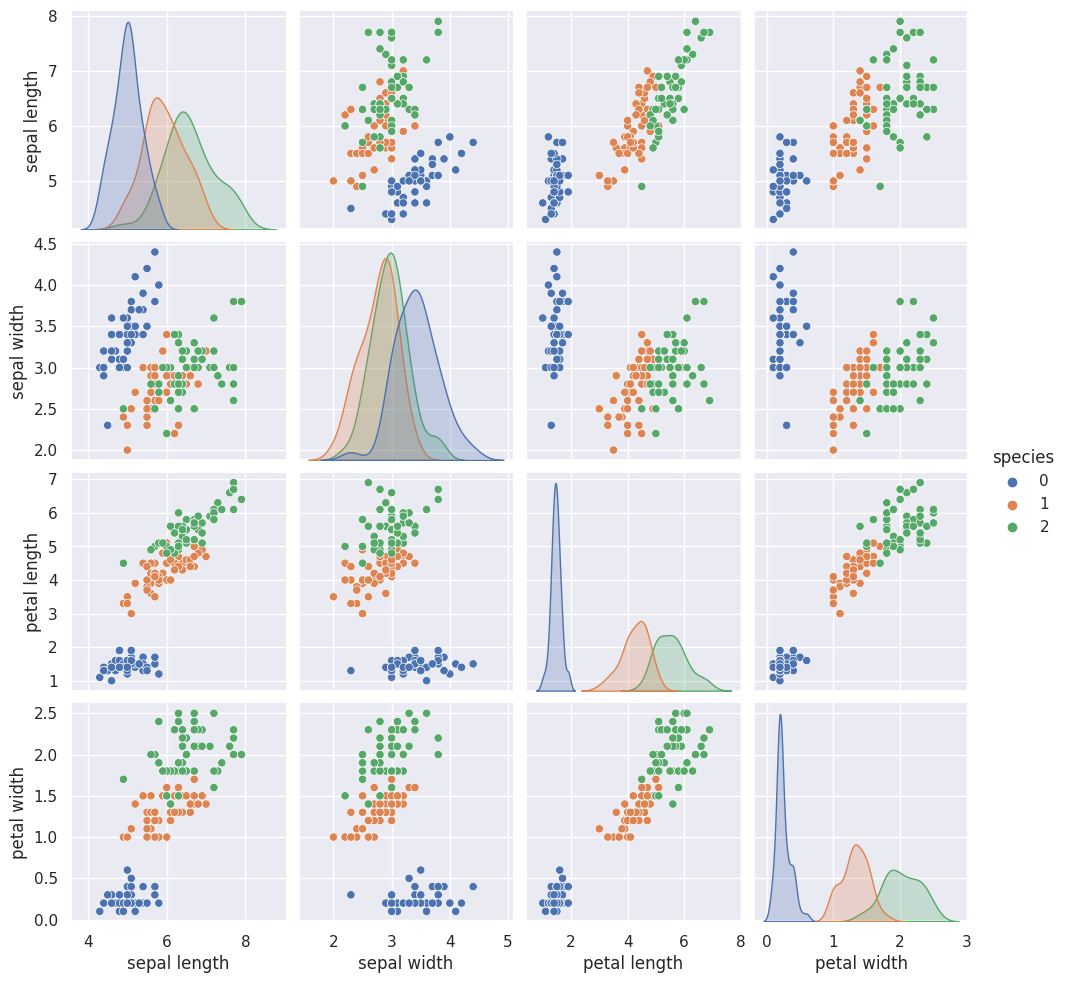

In [3]:
# Your code
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
sns.pairplot(data_iris, vars=features, hue='species', palette='deep')
plt.show()

<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Name one feature which might indicate linear separability of the classes.</li>
    </ul>
</div>

None of them have perfect linear separability, but I think <b>petal width</b> is closest.

<div class="alert alert-warning">
    <b>Exercise 1.5. [3 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the data set using <i>PCA</i> with 2 components and visualize the downprojection.</li>
    </ul>
</div>

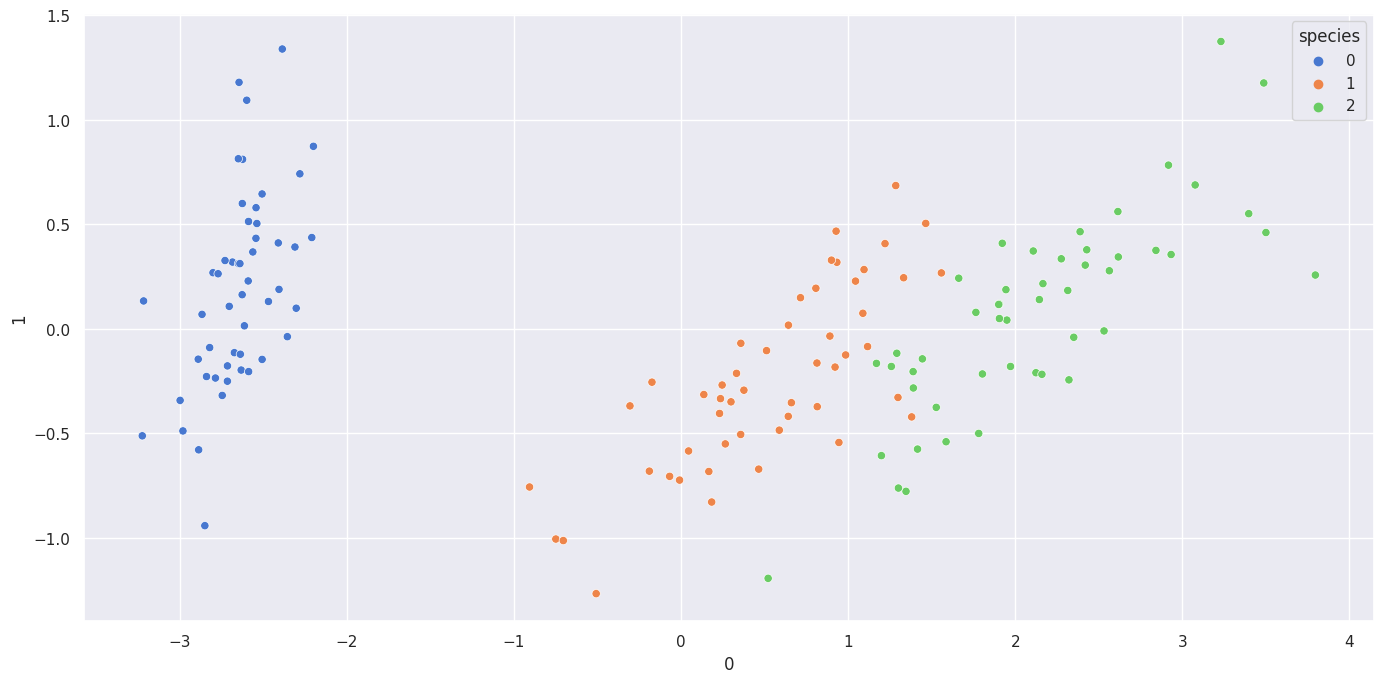

In [4]:
# Your code
data_iris_pca = u1.apply_pca(n_components=2, data=data_iris_X)
u1.plot_points_2d(data=data_iris_pca, targets=data_iris_y, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.6. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the original data set and plot the resulting clusters (the plotting must be done using the PCA-downprojected data).</li>
    </ul>
</div>

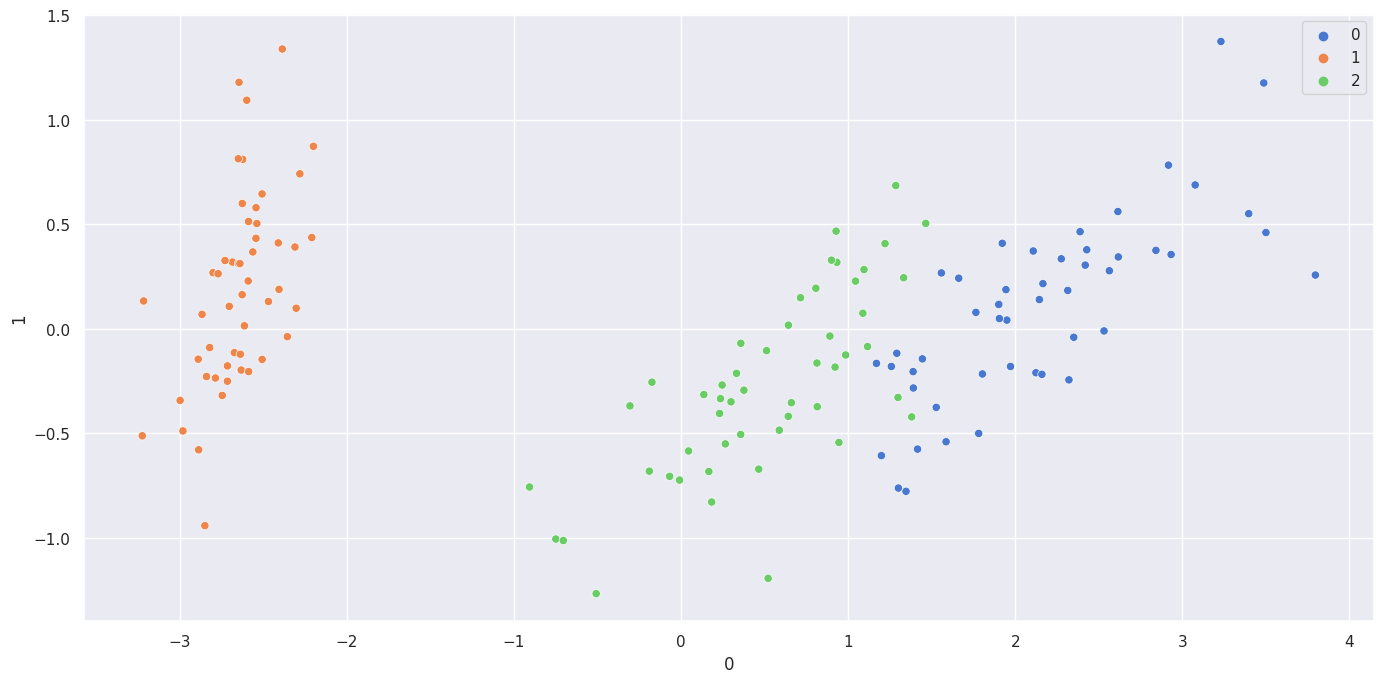

In [5]:
# Your code
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris)
u1.plot_points_2d(data=data_iris_pca, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.7. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the PCA-downprojected data set and plot the resulting clusters.</li>
    </ul>
</div>

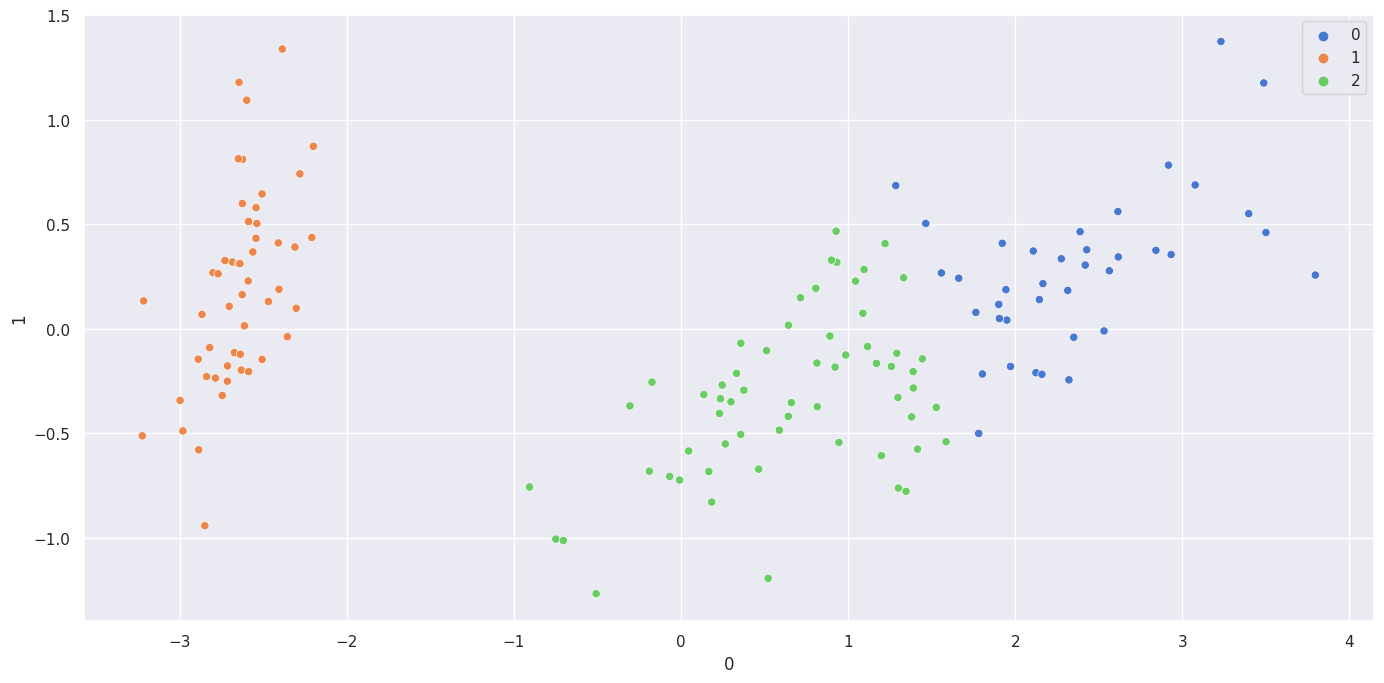

In [6]:
# Your code
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris_pca)
u1.plot_points_2d(data=data_iris_pca, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.8. [3 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the data set using <i>t-SNE</i> with 2 components and visualize the downprojection.</li>
        <li>Choose a fitting perplexity.</li>
    </ul>
</div>

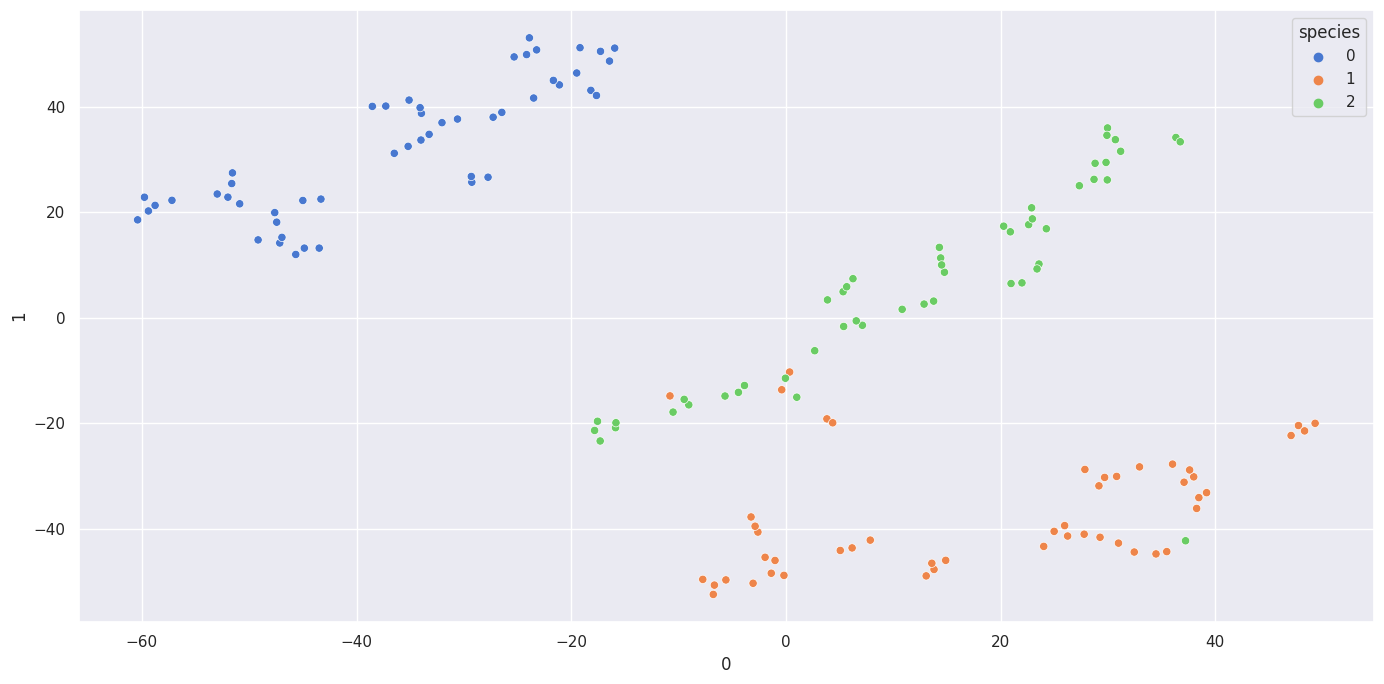

In [7]:
# Your code
u1.set_seed(123)

data_iris_tsne = u1.apply_tsne(n_components=2, data=data_iris_X, perplexity=4)
u1.plot_points_2d(data=data_iris_tsne, targets=data_iris_y, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.9. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the original data set and plot the resulting clusters (the plotting must be done using the t-SNE-downprojected data).</li>
    </ul>
</div>

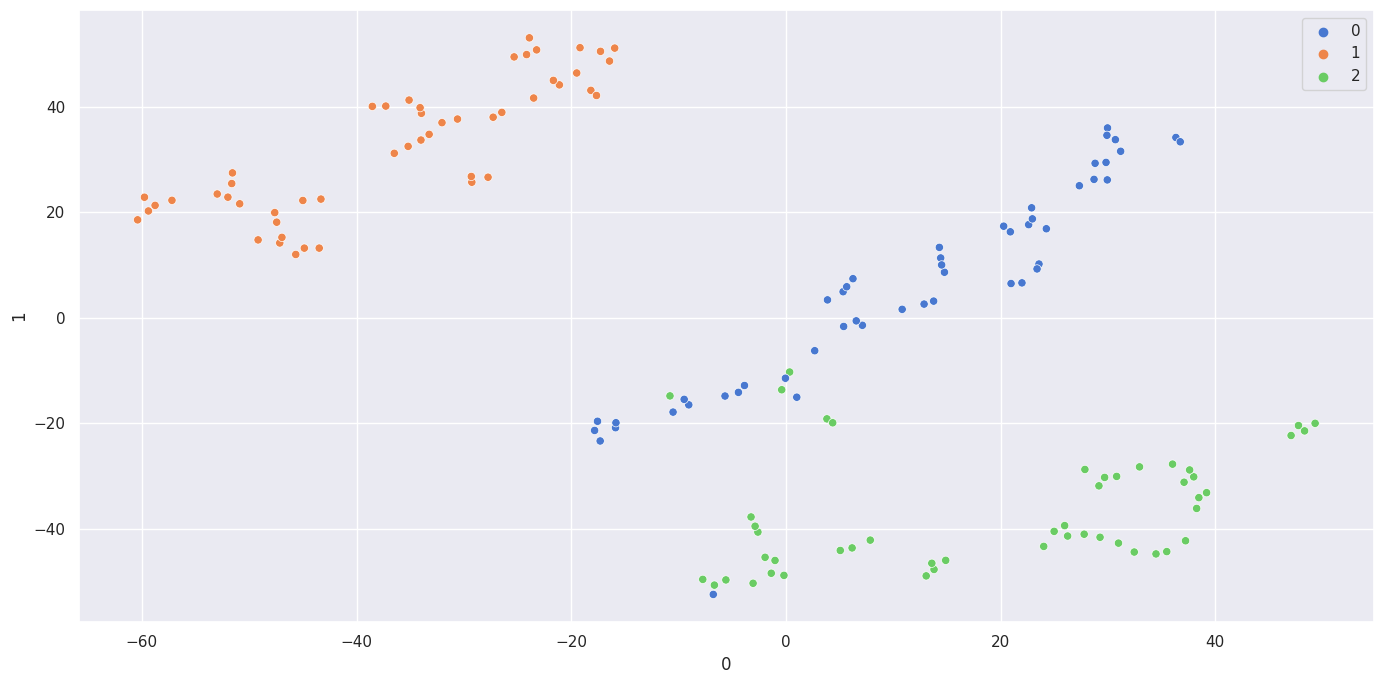

In [8]:
# Your code
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris)
u1.plot_points_2d(data=data_iris_tsne, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.10. [3 Points]</b>
    <ul>
        <li>Apply <i>$k$-means</i> on the t-SNE-downprojected data set and plot the resulting clusters.</li>
    </ul>
</div>

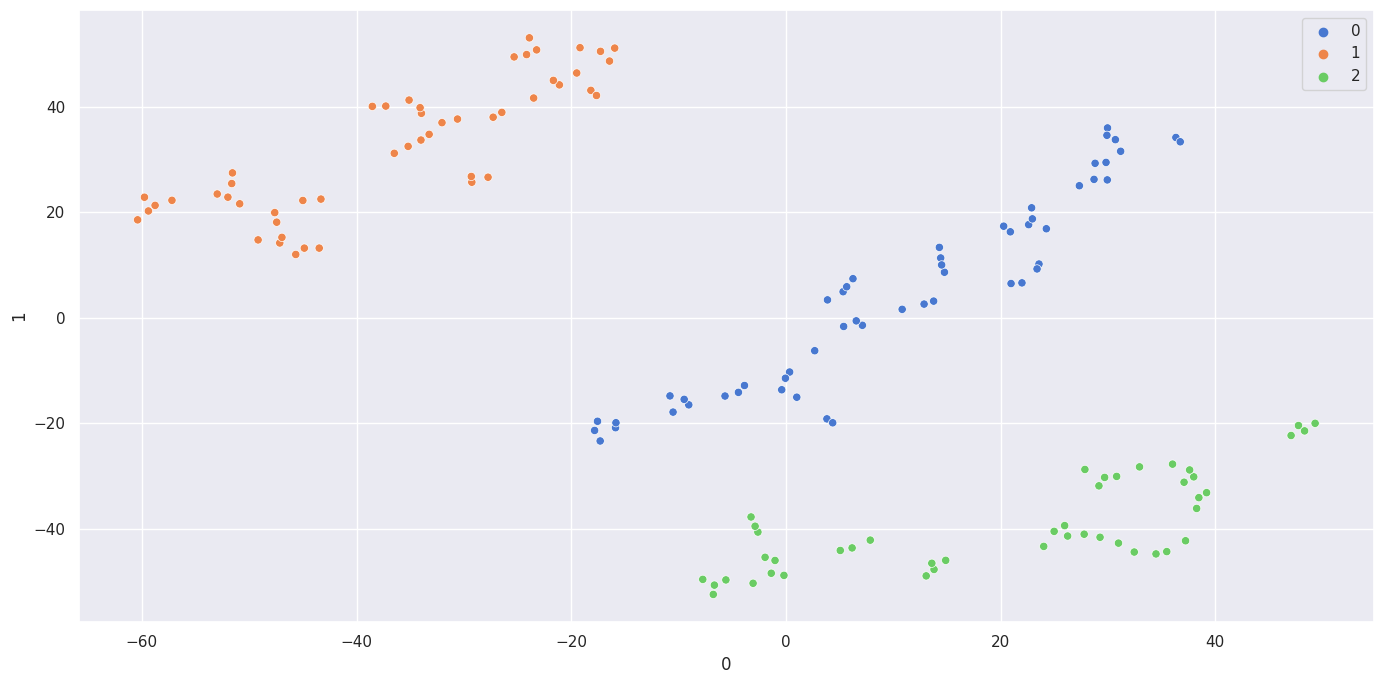

In [9]:
# Your code
u1.set_seed(123)

k_means_clusters = u1.apply_k_means(k=3, data=data_iris_tsne)
u1.plot_points_2d(data=data_iris_tsne, targets=k_means_clusters, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.11. [2 Points]</b>
    <ul>
        <li>Compare and interpret the results.</li>
    </ul>
</div>

Both PCA and tSNE did better when applying k-means to the original dataset, finding the border between the classes 1 and 2 (of the original PCA plot) more efficiently - only 1 datapoint differs in classification with kmeans (from what I can see), and catching the outliers in tSNE (again only 1 differs here). 

Applying k-means to the reduced dimensionality datasets still gives good results, but it doesn't classify the outliers or hard (mixed) places correctly.

<h2>2. Sequence data</h2>
<p>In this exercise you'll be working with <i>electricity demand</i> data as collected from the <i>Australian New South Wales Electricity Market</i>. It was first published/described by:</p>

<p><center><cite>M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999. </cite></center></p>

Currently, it is maintained by the <a href="https://www.openml.org/d/151">OpenML</a> project:

<center><cite>Joaquin Vanschoren, Jan N. van Rijn, Bernd Bischl, and Luis Torgo. OpenML: networked science in machine learning. SIGKDD Explorations 15(2), pp 49-60, 2013.</cite></center></p>
<center><cite>Matthias Feurer, Jan N. van Rijn, Arlind Kadra, Pieter Gijsbers, Neeratyoy Mallik, Sahithya Ravi, Andreas Mueller, Joaquin Vanschoren, Frank Hutter. OpenML-Python: an extensible Python API for OpenML. arXiv:1911.02490 [cs.LG], 2019</cite></center></p>

<div class="alert alert-warning">
    <b>Exercise 2.1. [2 Points]</b>
    <ul>
        <li>Load the <i>electricty</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the electricity data set in tabular form.</li>
    </ul>
</div>

In [10]:
# Your code
data_electricity = u1.load_electricity()
data_electricity

/home/darina/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1.
  warn(


,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,demand
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


<div class="alert alert-warning">
    <b>Exercise 2.2. [3 Points]</b>
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>demand</i>)?</li>
        <li>How many classes does the data set consist of?</li>
    </ul>
</div>

45312 samples; 
8 features;
2 classes

<div class="alert alert-warning">
    <b>Exercise 2.3. [4 Points]</b>
    <ul>
        <li>Visualize the electricity data set using <i>lineplots</i> with <i>period</i> as the x-axis, once <i>nswprice</i> and once <i>nswdemand</i> as the y-axis, colored by the feature <i>day</i>.</li>
        <li>Do you observe any correlations between both plots?</li>
    </ul>
</div>

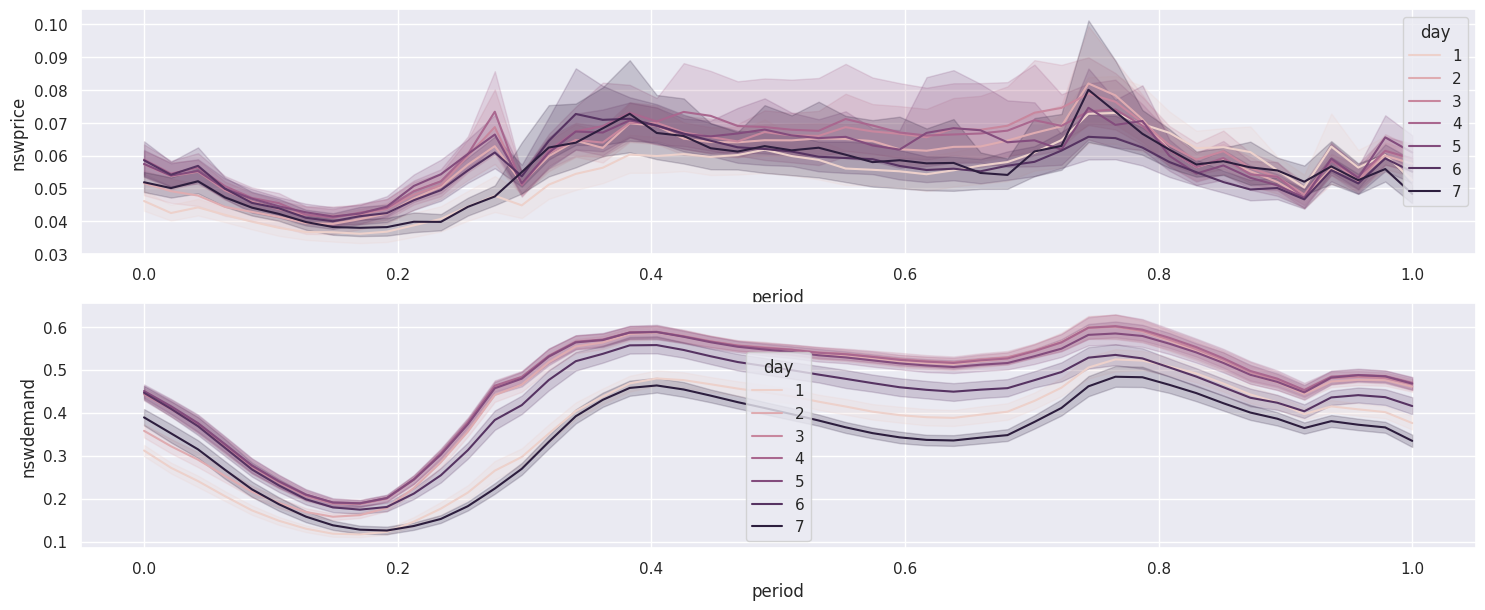

In [11]:
# Your code

# https://datagy.io/pandas-melt/

data_processed_electricity = data_electricity.copy().reset_index()
data_processed_electricity = data_processed_electricity.melt(
    id_vars=['period', 'day'], var_name='Category', value_vars=['nswprice', 'nswdemand'], value_name='Amount'
)

# https://datagy.io/filter-pandas/

data_nswprice = data_processed_electricity[data_processed_electricity['Category'].isin(['nswprice'])]
data_nswdemand = data_processed_electricity[data_processed_electricity['Category'].isin(['nswdemand'])]

fig, ax = plt.subplots(2, 1, figsize=(18, 7)) 

ax[0].set_ylabel('nswprice')
sns.lineplot(x='period', y='Amount', hue='day', data=data_nswprice, ax=ax[0])
ax[1].set_ylabel('nswdemand')
sns.lineplot(x='period', y='Amount', hue='day', data=data_nswdemand, ax=ax[1])

plt.show()

<div class="alert alert-warning">
    <b>Exercise 2.4. [2 Points]</b>
    <ul>
        <li>Do you observe any correlations between both plots?</li>
    </ul>
</div>

Yes, the general patterns are similar, the demand reflecting the price (going down, then up, then straight but slightly downwards, up and down again), however nswprice has significantly higher fluctuations.

<div class="alert alert-warning">
    <b>Exercise 2.5. [5 Points]</b>
    <ul>
        <li>Compute the average electricity demand <i>per day</i> for <i>NSW</i> and <i>VIC</i>, as well as the average electricity transfer. Hint: have a look at the <a href="https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups">pandas documentation</a> to group by <i>day</i>.</li>
        <li>Visualize the average electricity demand for <i>NSW</i> and <i>VIC</i>, as well as the average electricity transfer (the <i>day</i> should be on the x-axis).</li>
    </ul>
</div>

   Average NSW Demand  Average VIC Demand  Average Transfer
1            0.361246            0.329488          0.584304
2            0.451481            0.436461          0.485803
3            0.467290            0.457035          0.472999
4            0.468770            0.462713          0.468177
5            0.463843            0.461932          0.464048
6            0.423112            0.446299          0.475692
7            0.341707            0.365785          0.553282


<Axes: >

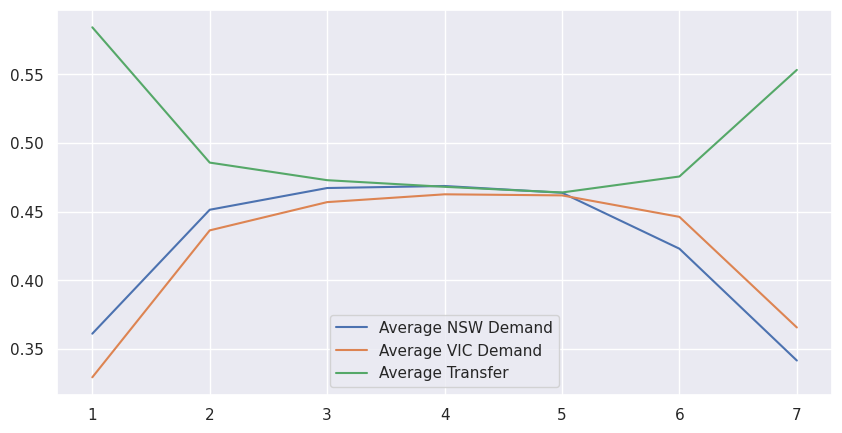

In [12]:
# Your code

# https://datagy.io/pandas-groupby/ 

averages = {}

for day in data_electricity['day'].unique():
    tempdf = data_electricity[data_electricity['day'] == day]

    average_nswdemand = tempdf['nswdemand'].mean()
    average_vicdemand = tempdf['vicdemand'].mean()
    average_transfer = tempdf['transfer'].mean()

    averages[day] = [average_nswdemand, average_vicdemand, average_transfer]

#didn't know if im allowed to import pandas myself here, so I imported it from the u1 utils
aggregate_df = u1.pd.DataFrame.from_dict(averages, orient='index', columns=['Average NSW Demand', 'Average VIC Demand', 'Average Transfer'])
aggregate_df = aggregate_df.sort_index()
print(aggregate_df)

# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html
aggregate_df.plot(legend=True, figsize=(10,5))

<div class="alert alert-warning">
    <b>Exercise 2.6. [2 Points]</b>
    <ul>
        <li>Does the above plot make sense?</li>
    </ul>
</div>

When the transfer is higher, the demand goes down, to the point where the trend lines look almost like inverses of each other. It makes enough sense - if we have more of something, its demand goes down. The thing that seems weirder to me is that the jumps are pretty big, but seeing as it is the weekend, it could be explained by more people at home, more electricity is generated and in circulation.

<h2>3. Image data</h2>

<p>In this exercice you'll be working with a data set composed of various <i>images</i> of handwritten digits. The data set distinguishes <i>ten</i> different classes, one for each digit. For curious minds, more information regarding this data set can be found at:

<center><cite>Modified National Institute of Standards and Technology database of handwritten digits (MNIST).
        Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner.</cite></center>

<div class="alert alert-warning">
    <b>Exercise 3.1. [2 Points]</b>
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Visualize the MNIST data set in tabular form.</li>
    </ul>
</div>

In [13]:
# Your code
data_mnist = u1.load_mnist()
data_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<div class="alert alert-warning">
    <b>Exercise 3.2. [10 Points]</b>
    <ul>
        <li>Define the following two $3 \times 3$ filters (shown in the formulae below) and apply them on 12 random images $A$ from the above data set (with $*$ as the convolution and $\sigma{}$ as the sigmoid operation) to produce the following 4 outputs $G_x, G'_x, G_y, G'_y$:</li>
    </ul>
    <p>
        \begin{equation}G_x = \left(
            \begin{array}{rrr}
                -5 & 0 & 5 \\
                -5 & 0 & 5 \\
                -5 & 0 & 5
            \end{array}\right) * A
            \qquad
            G'_x = \sigma (G_x)
        \end{equation}
    </p>
    <p>
        \begin{equation}G_y = \left(
            \begin{array}{rrr}
                -5 & -5 & -5 \\
                 0 &  0 &  0 \\
                 5 &  5 &  5
            \end{array}\right) * A
            \qquad
            G'_y = \sigma (G_y)
        \end{equation}
    </p>
    <ul>
        <li>Hint: Make sure to exclude the class label column <i>digit</i> before processing your data.</li>
    </ul>
</div>

In [14]:
# Your code
u1.set_seed(123)

# taking random indices from a range == nr of samples, then retrieving those samples to get randomness 
A_indices = np.random.randint(0, 70000, size = 12)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
A_samples = data_mnist.iloc[A_indices]
A_X, A_y = A_samples.drop(columns='digit'), A_samples['digit']
A_X = np.array(A_X)

G_x_filter = np.asarray([
    [-5, 0, 5],
    [-5, 0, 5],
    [-5, 0, 5]
])

G_y_filter = np.asarray([
    [-5, -5, -5],
    [0, 0, 0],
    [5, 5, 5]
])

def sigmoid(z):
    return 1/(1+np.exp(-z))

   
G_x = np.zeros(shape=(12, 784))
G_y = np.zeros(shape=(12, 784))

for i in range(12):
    A_x = A_X[i]
    A_x = np.reshape(A_x, (28, 28))
    
    G_x_single = signal.convolve2d(A_x, G_x_filter, mode="same")
    G_x_single = G_x_single.reshape(784,)
    G_x[i] = G_x_single

    G_y_single = signal.convolve2d(A_x, G_y_filter, mode="same")
    G_y_single = G_y_single.reshape(784,)
    G_y[i] = G_y_single
    

G_x_sigmoid = sigmoid(G_x)
G_y_sigmoid = sigmoid(G_y)

/tmp/ipykernel_51538/1200523996.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


<div class="alert alert-warning">
    <b>Exercise 3.3. [5 Points]</b>
    <ul>
        <li>Using the data of the 12 samples from above, create a plot with 5 rows (or 5 columns, choose what you like), where</li>
        <ul>
            <li>(1) shows the original samples</li>
            <li>(2) shows the samples after the convolution using the first filter, i.e., $G_x$</li>
            <li>(3) shows the samples after the convolution using the first filter and after the application of sigmoid, i.e., $G'_x$</li>
            <li>(4) shows the samples after the convolution using the second filter, i.e., $G_y$</li>
            <li>(5) shows the samples after the convolution using the second filter and after the application of sigmoid, i.e., $G'_y$</li>
        </ul>
    </ul>
</div>

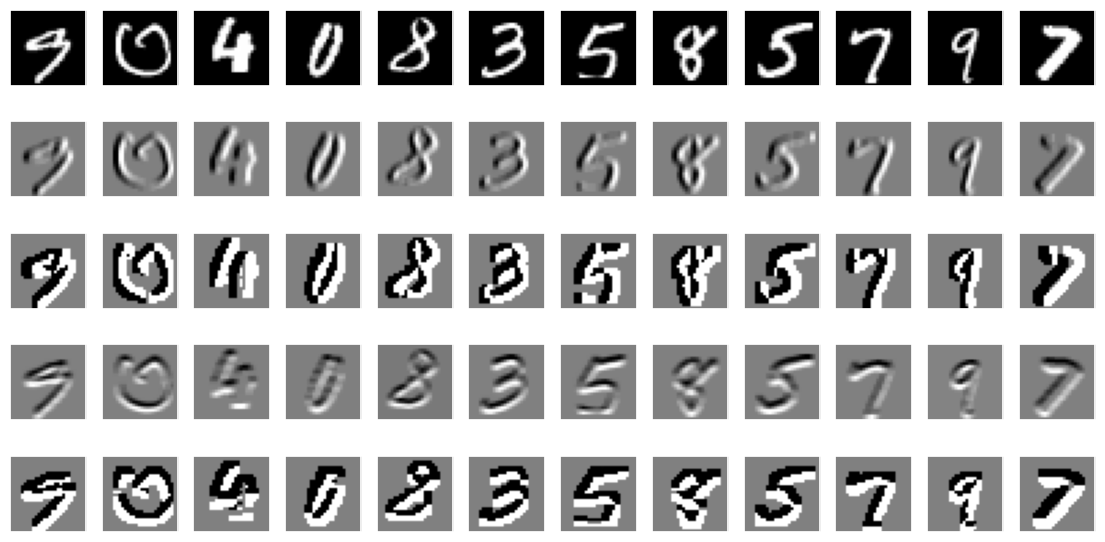

In [15]:
# Your code

# https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib
def display_arr(sample):
    image = np.array(sample, dtype='float')
    pixels = image.reshape((28, 28))
    return pixels

fig, ax = plt.subplots(5, 12, figsize=(14, 7))
for i in ax:
    for axis in i:
        # ticks were overlaping with the images and looked very ugly
        axis.set_xticks([])  
        axis.set_yticks([])  
        axis.grid(False)

for i in range(len(A_X)):
    ax[0][i].imshow(display_arr(A_X[i]), cmap='gray')
    ax[1][i].imshow(display_arr(G_x[i]), cmap='gray')
    ax[2][i].imshow(display_arr(G_x_sigmoid[i]), cmap='gray')
    ax[3][i].imshow(display_arr(G_y[i]), cmap='gray')
    ax[4][i].imshow(display_arr(G_y_sigmoid[i]), cmap='gray')
    
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.4. [8 Points]</b>
    <ul>
        <li>Implement a class <code>FNN</code> that derives from <code>torch.nn.Module</code> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28$ (flattened)</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>2</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>4</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>5</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [16]:
# Your code
class FNN(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.fc2 = torch.nn.Linear(512, 512)
        self.fc3 = torch.nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))        
        return self.fc3(x)

<div class="alert alert-warning">
    <b>Exercise 3.5. [8 Points]</b>
    <ul>
        <li>Implement a class <code>CNN</code> that derives from <code>torch.nn.Module</code> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28$</td>
        </tr>
        <tr>
            <td>1</td>
            <td>2D convolution</td>
            <td>$32$ output channels and a kernel size of $3\times{}3$</td>
        </tr>
        <tr>
            <td>2</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>max pooling</td>
            <td>kernel size of $2\times{}2$</td>
        </tr>
        <tr>
            <td>4</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>5</td>
            <td>ReLU</td>
            <td>-</td>
        </tr>
        <tr>
            <td>6</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [17]:
# Your code
class CNN(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3) # size = (28 - 3) + 1 = 26
        self.fc1 = torch.nn.Linear(32 * 13 * 13, 512)
        self.fc2 = torch.nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.relu(self.conv1(x))
        
        x = torch.max_pool2d(x, 2, 2) # size = 26 / 2 = 13
        x = x.view(-1, 32 * 13 * 13)        
        
        x = torch.relu(self.fc1(x))
        
        return self.fc2(x)

<div class="alert alert-warning">
    <b>Exercise 3.6. [3 Points]</b>
    <ul>
        <li>Split the MNIST data set in a <i>training</i> set ($75\%$) as well as <i>test</i> set ($25\%$).</li>
        <li>Print the size of the full data set, the training set and the test set.</li>
    </ul>
</div>

In [18]:
# Your code
u1.set_seed(123)

data_mnist_train, data_mnist_test = u1.split_data(data_mnist, test_size= 0.25)
print(f'  Full data set is of size: {data_mnist.shape[0]:>5}')
print(f'Training subset is of size: {data_mnist_train.shape[0]:>5}')
print(f' Testing subset is of size: {data_mnist_test.shape[0]:>5}')

  Full data set is of size: 70000
Training subset is of size: 52500
 Testing subset is of size: 17500


<div class="alert alert-warning">
    <b>Exercise 3.7. [5 Points]</b>
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $32$ (shuffle the training data set).</li>
    </ul>
</div>

In [19]:
# Your code
u1.set_seed(123)

loader_mnist_train = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_train.drop(columns=['digit']).values).reshape(len(data_mnist_train), 1, 28, 28),
        torch.from_numpy(data_mnist_train['digit'].values)
    ),
    batch_size=32,
    shuffle=True
)

loader_mnist_test = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_test.drop(columns=['digit']).values).reshape(len(data_mnist_test), 1, 28, 28),
        torch.from_numpy(data_mnist_test['digit'].values)
    ),
    batch_size=32,
    shuffle=False
)

<div class="alert alert-warning">
    <b>Exercise 3.8. [10 Points]</b>
    <ul>
        <li>For both an instance of your <code>FNN</code> and <code>CNN</code> model from above, train for $3$ epochs, print the training accuracy as well as the loss per epoch, and afterwards, print the final test set loss and accuracy.</li>
    </ul>
</div>

In [20]:
# Your code

u1.set_seed(123)

classes = [FNN(), CNN()]

for class_ in classes:
    target_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = class_.to(target_device)
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

    if isinstance(class_, FNN):
        name = 'FNN'
    else:
        name = 'CNN'
        
    print(f'{name} case:')
    
    num_epochs = 3
    for epoch in range(num_epochs):
        u1.train_network(
            model=model,
            data_loader=loader_mnist_train,
            device=target_device,
            optimizer=optimizer
        )
        
        performance = u1.test_network(
            model=model,
            data_loader=loader_mnist_train,
            device=target_device
        )
        
        print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
              f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')
    
    performance = u1.test_network(
        model=model,
        data_loader=loader_mnist_test,
        device=target_device
    )
    print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

FNN case:
Epoch: 1 / Train loss: 0.0033 / Train accuracy: 0.9688
Epoch: 2 / Train loss: 0.0019 / Train accuracy: 0.9817
Epoch: 3 / Train loss: 0.0010 / Train accuracy: 0.9913

Test loss: 0.0035 / Test accuracy: 0.9661
CNN case:
Epoch: 1 / Train loss: 0.0026 / Train accuracy: 0.9746
Epoch: 2 / Train loss: 0.0016 / Train accuracy: 0.9833
Epoch: 3 / Train loss: 0.0008 / Train accuracy: 0.9928

Test loss: 0.0021 / Test accuracy: 0.9789
